## 实验题目4 牛顿(Newton)迭代法

### 实验简介

本实验为牛顿迭代法求解非线性方程的根，需要编写牛顿迭代法代码，并在给定初值的情况下对实验题目所提供方程进行数值的精确求解。

本次实验过程中，主要为熟悉牛顿迭代法的代码实现，同时对比了重根修正的牛顿迭代法的特点，将牛顿迭代法改写为重根的特殊形式，简化代码。除此之外，本实验过程中对比了`Roots.jl`及`NLsolve.jl`与手写的牛顿法的差异，意外的发现`NLsolve.jl`库中指定`nlsolve()`参数为`method="newton"`时求解题目所给方程的效率低于直接手写的牛顿法，不过一定程度上可以理解为`NLsolve.jl`本身为求解高维线性系统的通用工具，对于求解单个非线性方程时有冗余的开销。当然，以`Roots.jl`库的`fzeros()`函数求解结果为精确值进行对比，手写的牛顿法效率和准确度都稍低于经过高度优化的库函数。

实验的目的为使用牛顿迭代法，在给定初值的条件下数值求解非线性方程的根。

该实验报告主要分为6个部分，大纲罗列如下：

- **实验简介**：即本部分的所有内容
- **数学原理**：即牛顿迭代法的数学推导和重根修正的牛顿迭代法的数学原理
- **代码实现**：使用`Julia`语言，根据数学原理，编写实验代码
- **实验题目**：实验指导书中所要求的进行求解的给定初值的非线性方程，给定求解精度和最大迭代次数后使用牛顿迭代法进行数值求解。各题目输出均打印了`Roots.jl`、`NLsolve.jl`和本人手写的牛顿法的结果，对比了所求的根的精度、求解耗时、迭代次数等，便于进一步分析。
  - **执行代码**：本部分为对实验代码进行封装的部分，`get_func_diff()`是符号求导的预处理，`show_plot()`是根据函数作图的部分，`collect_data()`是汇总表格打印所需数据的部分，最后`show_result()`为外界直接调用的部分。
  - **问题1**：本题为对简单的非线性方程进行求解的问题，直接调用`show_result()`进行调用即可。
  - **问题2**：探究直接采用牛顿法求解带有重根问题的缺陷，通过对比本题两小问求解的结果，加强对理论知识的认识，引出重根修正的牛顿迭代法的使用。同时因本人对比了标准的非线性系统求解库所得结果与手写牛顿法的结果，很容易确定所编写算法的正确性。
- **思考题**：本部分为实验指导书中所要求的完成的思考题解答

### 数学原理

#### 牛顿迭代法

$\text{设}y=f\left( x \right) \text{有反函数}x=g\left( y \right) ,\text{则在}f\left( x \right) =0\text{的根邻域内},g\left( y \right) \text{关于点}y_i=f\left( x_i \right) \text{的}Taylor\text{展式为}$

$$
x=g\left( y \right) =\sum_{j=0}^{m+1}{\frac{\left( y-y_i \right) ^j}{j!}g^{\left( j \right)}\left( y_i \right)}+\frac{\left( y-y_i \right) ^{m+2}}{\left( m+2 \right) !}g^{(m+2)}\left( \eta _i \right) ,
$$

$\text{其中},\eta _i\text{介于}y\text{与}y_i\text{之间}.\text{因为}\alpha =g\left( 0 \right) ,\text{所以得}$

$$
\begin{aligned}
\alpha&=x_i+\sum_{j=0}^{m+1}{\frac{\left( -1 \right) ^j}{j!}\left[ f\left( x_i \right) \right] ^jg^{\left( j \right)}\left( y_i \right)}+\frac{\left( -1 \right) ^{m+2}}{\left( m+2 \right) !}\left[ f\left( x_i \right) \right] ^{m+2}g^{(m+2)}\left( \eta _i \right)\\
	&\approx x_i-\frac{f\left( x_i \right)}{f'\left( x_i \right)}+\sum_{j=2}^{m+1}{\frac{\left( -1 \right) ^j}{j!}\left[ f\left( x_i \right) \right] ^jg^{\left( j \right)}\left( y_i \right)}\\
\end{aligned}
$$

$\text{所以可以构造迭代公式}$

$$
x_{i+1}=x_i-\frac{f\left( x_i \right)}{f'\left( x_i \right)}+\sum_{j=2}^{m+1}{\frac{\left( -1 \right) ^j}{j!}\left[ f\left( x_i \right) \right] ^jg^{\left( j \right)}\left( y_i \right)}
$$

$\text{可以证明}$

$$
\lim_{i\rightarrow \infty} \frac{|\varepsilon _{i+1}|}{|\varepsilon _i|^{m+2}}=\frac{1}{\left( m+2 \right) !}|f'\left( \alpha \right) |^{m+2}|g^{\left( m+2 \right)}\left( 0 \right) |\ne 0,
$$

$\text{即迭代公式的收敛阶为}p=m+2,\text{取}m=0\text{时迭代公式为牛顿迭代公式},\text{即}$

$$
x_{i+1}=x_i-\frac{f\left( x_i \right)}{f'\left( x_i \right)},     i=0,1,2,\cdots ,
$$
$\text{收敛阶为}p=2,\text{即}$
$$
\lim_{i\rightarrow \infty} \frac{|\varepsilon _{i+1}|}{|\varepsilon _i|^2}=\frac{|f''\left( \alpha \right) |}{2|f'\left( \alpha \right) |}.
$$
$\text{应该指出},Newton\text{迭代法是局部收敛的方法},\text{因此},\text{他是否收敛},\text{与初值的选取有关}.\text{当初值}x_0\text{的选取充分接近根}\alpha \text{时，一般可保证迭代收敛}.$

#### 重根修正的牛顿迭代法

$\text{上述讨论是基于}\alpha \text{为单根的,若根的重数}r>1\text{，即}f\left( \alpha \right) =f'\left( \alpha \right) =\cdots =f^{\left( r-1 \right)}\left( \alpha \right) =0,\text{则所有建立在反函数基础上的推导均无效}. $

$\text{虽然如此,可以证明}Newton\text{迭代在重根邻域是线性收敛的}.$

$\text{考虑牛顿迭代法的迭代函数如下}$

$$
\begin{aligned}
	\varphi \left( x \right) &=x-\frac{f\left( x \right)}{f'\left( x \right)}\\
	&=x-\frac{1}{r}\frac{f^{\left( r \right)}\left( \zeta _1 \right)}{f^{\left( r \right)}\left( \zeta _2 \right)}\left( x-\alpha \right) ,\zeta _1,\zeta _2\text{在}x\text{与}\alpha \text{之间}.\\
\end{aligned}
$$
$\text{考虑到}\varphi \left( \alpha \right) =\alpha ,\text{于是有}$
$$
\varphi '\left( \alpha \right) =\lim_{x\rightarrow \alpha} \frac{\varphi \left( x \right) -\varphi \left( \alpha \right)}{x-\alpha}=1-\frac{1}{r}\ne 0,r\ne 1,
$$
$\text{由}r>1,\varphi \left( \alpha \right) =1-\frac{1}{r}<1,\text{故可知}Newton\text{迭代法对于}r\text{重根}\alpha \text{是一阶收敛的}.$

$\text{接下来，对}Newton\text{迭代法进行修正},\text{当}r\text{重数已知时},\text{修正如下}$
$$
x_{i+1}=x_i-r\frac{f\left( x_i \right)}{f'\left( x_i \right)},i=0,1,2,\cdots ,
$$
$\text{可以证明},\text{此式对}r\text{重根}\alpha \text{是二阶收敛的}.$


### 代码实现

#### packages

首先导入所需要用的包。

`NLsolve.jl`是指定求解非线性系统求解方式的数值求解库，本例中将指定采用`newton`方法对非线性方程进行求解；

`SymPy.jl`是从`Python`移植来的符号运算库，完全支持`Python`中的所有功能，本例中用于对函数进行符号求导；

`Roots.jl`是官方提供的求根工具库，内置封装且进行了优化的在指定区间数值求根的工具`fzeros()`，本例中是实验效果最好的求解工具，精度最高，耗时最短。

In [268]:
using Printf
using Plots
using NLsolve
using SymPy
using Roots
using PrettyTables
using LaTeXStrings

#### newton

本部分为牛顿法的代码实现，使用重根的迭代法作为外层代码，牛顿法实现为重根修正的特殊形式，即$\lambda=1$

In [269]:
# multi-root newton method
function newton(f::Function, df::Function, ϵ1, ϵ2, N, x0, λ)
    n = 1
    while n <= N
        F = f(x0)
        DF = df(x0)
        if abs(F) < ϵ1
            return n - 1, x0
        end
        if abs(DF) < ϵ2
            @printf("Reach a critical point!\n")
            return
        end
        x1 = x0 - λ * F / DF
        Tol = abs(x1 - x0)
        if Tol < ϵ1
            return n - 1, x1
        end
        n = n + 1
        x0 = x1
    end
    @printf("Fail to converge within %d iterations!\n", N)
end
# newton method
function newton(f::Function, df::Function, ϵ1, ϵ2, N, x0)
    newton(f, df, ϵ1, ϵ2, N, x0, 1.0)
end

newton (generic function with 2 methods)

### 实验题目

实验指导书中所要求的进行求解的给定初值的非线性方程，给定求解精度和最大迭代次数后使用牛顿迭代法进行数值求解。

各题目输出均打印了`Roots.jl`、`NLsolve.jl`和本人手写的牛顿法的结果，对比了所求的根的精度、求解耗时、迭代次数等，便于进一步分析。

#### 执行代码

本部分为对实验代码进行封装的部分，`get_func_diff()`是符号求导的预处理，`show_plot()`是根据函数作图的部分，`collect_data()`是汇总表格打印所需数据的部分，最后`show_result()`为外界直接调用的部分。

##### preprocessing

In [273]:
function get_func_diff(symf::Sym)
    @syms x
    symdf = diff(symf)
    f = lambdify(symf)
    df = lambdify(symdf)
    f, df
end
function get_func_diff(f::Function)
    @syms x
    symf = f(x)
    symdf = diff(symf)
    df = lambdify(symdf)
    f, df
end
function redefine_func(f::Function, df::Function)
    function f!(r, x)
        r .= f.(x)
    end
    function j!(J, x)
        (s1, s2) = size(J)
        J .= zeros(s1, s1)
        for i in 1:s1
            J[i, i] = df(x[i])
        end
    end
    f!, j!
end
function show_plots(f::Function, x0, title)
    x = range(start=x0 - 0.5, stop=x0 + 0.5, length=100)
    y = [f.(x), 0 .* x]
    label = ["y=f(x)" "y=0"]
    p = plot(f, label="y=f(x)", title=title, legend=:outertopright)
    p = plot!([0], seriestype=:hline, label="y=0")
    display(p)
    p = plot(x, y, label=label, title=title, legend=:outertopright)
    display(p)
    p
end
function collect_data(f::Function, df::Function, f!::Function, j!::Function,
    x0, ϵ1, ϵ2, N, λ)

    t1 = @elapsed rs = fzeros(f, x0 - 0.5, x0 + 0.5)
    r1 = rs[1]
    i1 = NaN

    t2 = @elapsed sol = nlsolve(f!, j!, [x0]; method=:newton, ftol=ϵ1, iterations=N)
    r2 = sol.zero[1]
    # println(sol)
    i2 = sol.iterations[1]

    t3 = @elapsed i3, r3 = newton(f, df, ϵ1, ϵ2, N, x0)
    if λ > 1
        t4 = @elapsed i4, r4 = newton(f, df, ϵ1, ϵ2, N, x0, λ)
        xs = [r1, r2, r3, r4]
        ts = [t1, t2, t3, t4]
        is = [i1, i2, i3, i4]
        method_name = ["lib Roots", "lib NLsolve", "my newton", "my newton (λ=$λ)"]
        data = [method_name xs f.(xs) ts is]
        return data
    else
        xs = [r1, r2, r3]
        ts = [t1, t2, t3]
        is = [i1, i2, i3]
        method_name = ["lib Roots", "lib NLsolve", "my newton"]
        data = [method_name xs f.(xs) ts is]
        return data
    end
end

collect_data (generic function with 1 method)

##### show_result

In [274]:
function show_result(f::Function, x0, ϵ1, ϵ2, N, title)
    f, df = get_func_diff(f)
    f!, j! = redefine_func(f, df)
    show_plots(f, x0, L"~~~~~~~~~~" * title)

    header = (["Method", "x", "f(x)", "Time Cost (s)", "Iter"])
    data = collect_data(f, df, f!, j!, x0, ϵ1, ϵ2, N, 1)
    pretty_table(
        data;
        alignment=[:c, :c, :c, :c, :c],
        header=header,
        header_crayon=crayon"bold"
        # tf = tf_markdown,
        # formatters=ft_printf("%18.14f")
    )

end
function show_result(f::Function, x0, λ, ϵ1, ϵ2, N, title)
    f, df = get_func_diff(f)
    f!, j! = redefine_func(f, df)
    show_plots(f, x0, L"~~~~~~~~~~" * title)

    header = (["Method", "x", "f(x)", "Time Cost (s)", "Iter"])
    data = collect_data(f, df, f!, j!, x0, ϵ1, ϵ2, N, λ)
    pretty_table(
        data;
        alignment=[:c, :c, :c, :c, :c],
        header=header,
        header_crayon=crayon"bold"
        # tf = tf_markdown,
        # formatters=ft_printf("%18.14f")
    )
end

show_result (generic function with 2 methods)

#### 问题 1

##### 1.1

$f(x)=\cos x -x=0,~~~~x_0=\frac{\pi}{4}\approx 0.78539816$

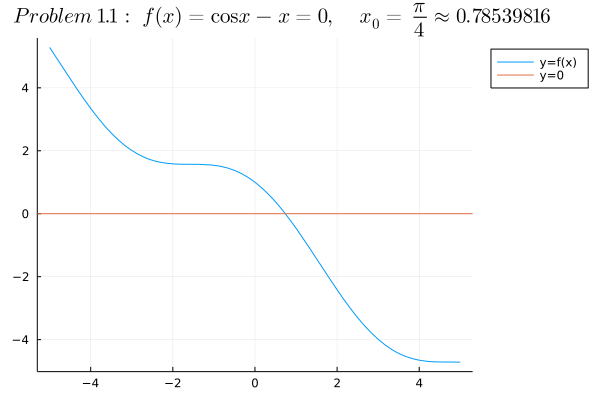

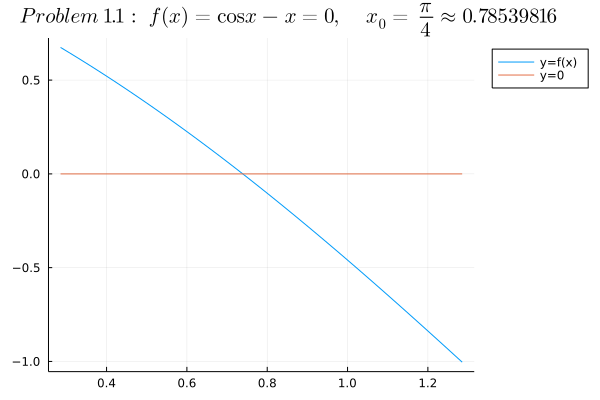

┌─────────────┬──────────┬─────────────┬───────────────┬──────┐
│   Method    │    x     │    f(x)     │ Time Cost (s) │ Iter │
├─────────────┼──────────┼─────────────┼───────────────┼──────┤
│  lib Roots  │ 0.739085 │     0.0     │   0.0047204   │ NaN  │
│ lib NLsolve │ 0.739085 │ -7.51299e-8 │   0.0956659   │ 2.0  │
│  my newton  │ 0.739085 │ -7.51299e-8 │   0.0195131   │ 2.0  │
└─────────────┴──────────┴─────────────┴───────────────┴──────┘


In [275]:
f(x) = cos(x) - x
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = pi / 4
title = L"Problem\ 1.1:\ f(x)=\cos x -x=0,~~~~x_0=\frac{\pi}{4}\approx 0.78539816"
show_result(f, x0, ϵ1, ϵ2, N, title)

##### 1.2

$f(x)=e^{-x}-\sin x=0,~~~~x_0=0.6$

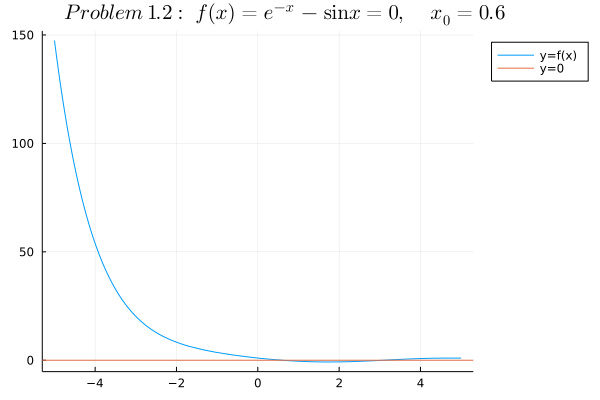

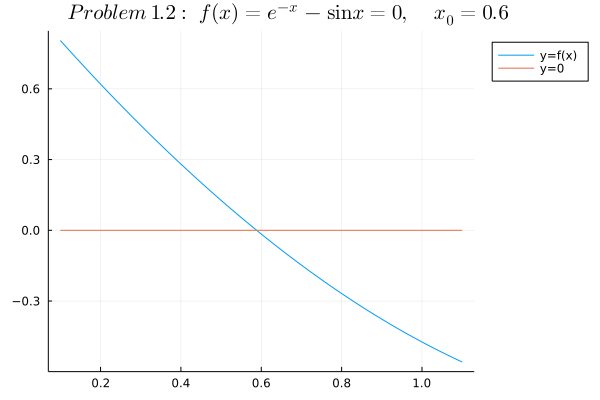

┌─────────────┬──────────┬────────────┬───────────────┬──────┐
│   Method    │    x     │    f(x)    │ Time Cost (s) │ Iter │
├─────────────┼──────────┼────────────┼───────────────┼──────┤
│  lib Roots  │ 0.588533 │    0.0     │   0.0041733   │ NaN  │
│ lib NLsolve │ 0.588533 │ 1.57258e-9 │   0.0842298   │ 2.0  │
│  my newton  │ 0.588533 │ 1.57258e-9 │   0.0200605   │ 2.0  │
└─────────────┴──────────┴────────────┴───────────────┴──────┘


In [276]:
f(x) = exp(-x) - sin(x)
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.6
title = L"Problem\ 1.2:\ f(x)=e^{-x}-\sin x=0,~~~~x_0=0.6"
show_result(f, x0, ϵ1, ϵ2, N, title)

#### 问题 2

##### 2.1

$f(x)=x-e^{-x}=0,~~~~x_0=0.5$

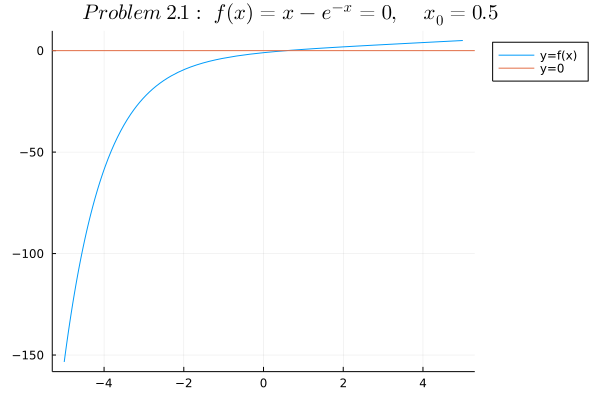

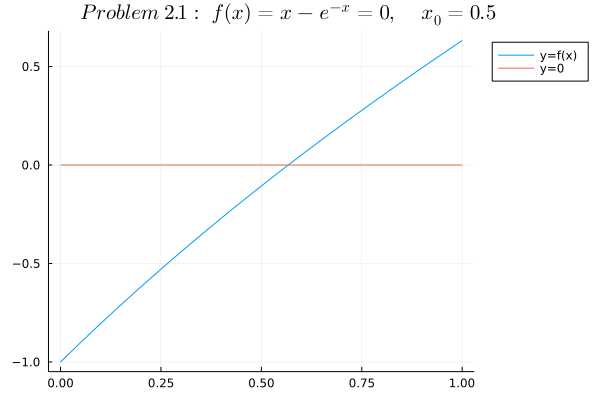

┌─────────────┬──────────┬────────────┬───────────────┬──────┐
│   Method    │    x     │    f(x)    │ Time Cost (s) │ Iter │
├─────────────┼──────────┼────────────┼───────────────┼──────┤
│  lib Roots  │ 0.567143 │    0.0     │   0.0038645   │ NaN  │
│ lib NLsolve │ 0.567143 │ -1.9648e-7 │   0.0644682   │ 2.0  │
│  my newton  │ 0.567143 │ -1.9648e-7 │   0.0200168   │ 2.0  │
└─────────────┴──────────┴────────────┴───────────────┴──────┘


In [265]:
f(x) = x - exp(-x)
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 10
x0 = 0.5
title = L"Problem\ 2.1:\ f(x)=x-e^{-x}=0,~~~~x_0=0.5"
show_result(f, x0, ϵ1, ϵ2, N, title)

##### 2.2

$f(x)=x^2 -2x e^{-x} + e^{-2x}=0,~~~~ x_0=0.5$

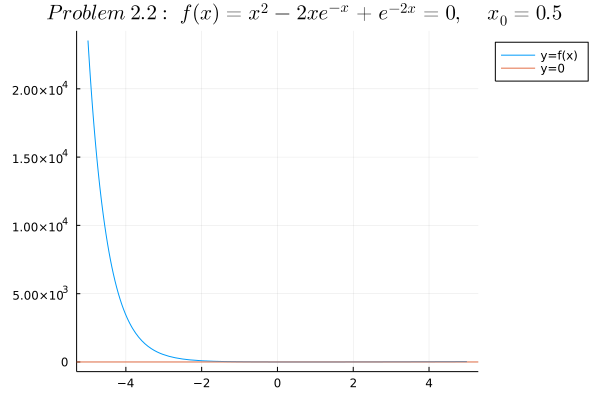

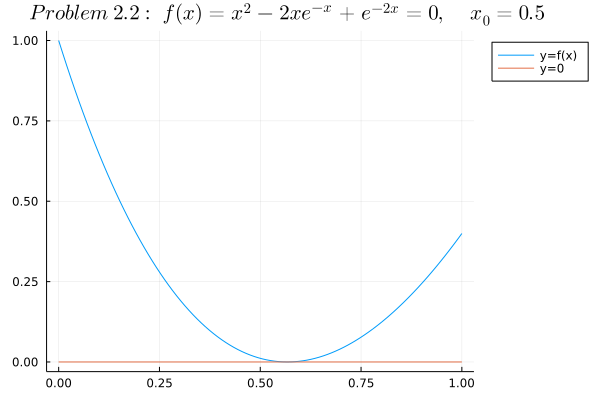

┌─────────────────┬──────────┬─────────────┬───────────────┬──────┐
│     Method      │    x     │    f(x)     │ Time Cost (s) │ Iter │
├─────────────────┼──────────┼─────────────┼───────────────┼──────┤
│    lib Roots    │ 0.567143 │     0.0     │   0.0050046   │ NaN  │
│   lib NLsolve   │ 0.566606 │ 7.09902e-7  │   0.0675075   │ 7.0  │
│    my newton    │ 0.566606 │ 7.09902e-7  │   0.0201382   │ 7.0  │
│ my newton (λ=2) │ 0.567143 │ 3.86358e-14 │   0.0156408   │ 2.0  │
└─────────────────┴──────────┴─────────────┴───────────────┴──────┘


In [267]:
f(x) = x^2 - 2x * exp(-x) + exp(-2x)
ϵ1 = 1e-6
ϵ2 = 1e-4
N = 20
x0 = 0.5
λ = 2
title = L"Problem\ 2.2:\ f(x)=x^2 -2x e^{-x} + e^{-2x}=0,~~~~ x_0=0.5"
show_result(f, x0, λ, ϵ1, ϵ2, N, title)


### 思考题

1. 对问题 1 确定初值的原则是什么？实际计算中应如何解决？

   选择一个有根区间，本例中容易得到
   
   $f(x)=\cos(x)-x$，有$f(0)=1>0,f(\frac{\pi}{2})=-\frac{\pi}{2}<0$，取区间中点即$x=\frac{\pi}{4}$为初值
   
   $f(x)=e^{-x} - \sin(x)$，有$f(0)=1>0,f(1.2)\approx-0.631<0$，同样取区间中点即$x=0.6$为初值
   
   实际计算中，根据其他算法求出多个精度较粗的有根区间，然后使用牛顿法逼近获得较为精确的数值解。
   
   通常，对于我们而言，可能在给定区间直接作出函数图像是最简单最可行的方式<sup>8,9</sup>。

   不过也存在一些数值的算法，可以计算给定区间函数根的情况，如`Julia`的`Roots.jl`库中的`fzeros()`函数，是本实验中尝试的所有方法中效率最高的，精度最高和计算耗时最短。

   除此以外，在我所查找的资料中提及，对于更一般的情形，试图通过程序自动化来计算函数的根的话，情况会变得更加复杂，涉及到多个领域的研究<sup>10,11</sup>。
   
2. 对问题 2 如何解释在计算中出现的现象？试加以说明

   本例中，
   
   $(1)f_1(x) = x - e^{-x}=0$

   ```
   ┌─────────────┬──────────┬────────────┬───────────────┬──────┐
   │   Method    │    x     │    f(x)    │ Time Cost (s) │ Iter │
   ├─────────────┼──────────┼────────────┼───────────────┼──────┤
   │  lib Roots  │ 0.567143 │    0.0     │   0.0038645   │ NaN  │
   │ lib NLsolve │ 0.567143 │ -1.9648e-7 │   0.0644682   │ 2.0  │
   │  my newton  │ 0.567143 │ -1.9648e-7 │   0.0200168   │ 2.0  │
   └─────────────┴──────────┴────────────┴───────────────┴──────┘
   ```
   $(2)f_2(x) = x^2 - 2xe^{-x} + e^{-2x}=(x - e^{-x})^{2}={f_1}^2(x)=0$
      
   ```
   ┌─────────────────┬──────────┬─────────────┬───────────────┬──────┐
   │     Method      │    x     │    f(x)     │ Time Cost (s) │ Iter │
   ├─────────────────┼──────────┼─────────────┼───────────────┼──────┤
   │    lib Roots    │ 0.567143 │     0.0     │   0.0050046   │ NaN  │
   │   lib NLsolve   │ 0.566606 │ 7.09902e-7  │   0.0675075   │ 7.0  │
   │    my newton    │ 0.566606 │ 7.09902e-7  │   0.0201382   │ 7.0  │
   │ my newton (λ=2) │ 0.567143 │ 3.86358e-14 │   0.0156408   │ 2.0  │
   └─────────────────┴──────────┴─────────────┴───────────────┴──────┘
   ```
   
   显然，方程(2)在方程(1)的根位置有重根，可以看到直接应用牛顿迭代法计算轮数为7轮，耗时通常情况下稍微增加，但由于当前实例计算简单、精度要求低，耗时变化不明显，不过能看到在给定精度要求情况下所得精度低于无重根牛顿迭代法。

   由理论课知识可知，当存在重根时牛顿迭代法的收敛速度为线性收敛。在后续使用修正的牛顿法可以使收敛速度重新达到平方收敛，耗时几乎与无重根时一致，迭代次数和精度也相同。

   除此以外，在本实验中，直接手写的牛顿法`my newton`运行效率意外的高于库`NLsolve.jl`指定`nlsolve()`参数`method=:newton`后的求解效率，耗时更短，这是让人十分意外的。当然，事实上在同一数量级时间的差异并不大，而`NLsolve.jl`库通用于求解非线性系统，仍然是指定了使用牛顿法来求解实际问题时的优选。而对于一般求解数值根，在给定区间时，使用求解方式得到优化的`Roots.jl`库中的`fzeros()`函数应当为效率最高的选择。

3. 略


### 参考资料

1. julia covert sym to func https://stackoverflow.com/questions/27357579/julia-how-do-i-convert-a-symbolic-expression-to-a-function
2. julia SymPy Tutorial https://docs.juliahub.com/SymPy/KzewI/1.0.28/Tutorial/basic_operations/#lambdify-1
3. julia SymPy Tutorial https://docs.juliahub.com/SymPy/KzewI/1.0.28/Tutorial/solvers/
4. julia time elapse https://discourse.julialang.org/t/difference-between-tic-toc-time-or-elapse-in-julia/1177/2
5. julia NLsolve github https://github.com/JuliaNLSolvers/NLsolve.jl
6. 《数值分析原理》吴勃英 18-19,27-29
7. 《计算方法实验指导》实验题目 4 牛顿(Newton)迭代法
8. how to find initial guess https://computingskillset.com/solving-equations/how-to-find-the-initial-guess-in-newtons-method/ 
9. how to choose starting point https://math.stackexchange.com/questions/743373/how-to-choose-the-starting-point-in-newtons-method
10. wikipedia newton fractal https://en.wikipedia.org/wiki/Newton_fractal
11. How to find all roots of complex polynomials by Newton’s method https://link.springer.com/article/10.1007/s002220100149